In [4]:
!pip install --upgrade geopandas
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 86.7 MB/s eta 0:00:00


In [5]:
# Import used packages
import geopandas as gpd  # used to read the shapfile
import rasterio as rio   # used to read the raster (.tif) files
from rasterio.plot import show # used to make plots using rasterio
import matplotlib.pyplot as plt #to make plots using matplotlib
import numpy as np

In [1]:
## Mount google drive to get the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Read your point shapefiles (Landslide and Non-Landslide locations)
# Replace with your actual landslide inventory points
points = gpd.read_file('/content/drive/MyDrive/Research/skiim_for_use/sikkim_test.shp')

print(f"Number of points: {len(points)}")
print(f"Columns: {points.columns.tolist()}")
points.head()

Number of points: 300
Columns: ['FID', 'geometry']


,FID,geometry
0,0,POINT (88.76664 27.22493)
1,1,POINT (88.70063 27.42836)
2,2,POINT (88.4789 27.60265)
3,3,POINT (88.50558 27.75938)
4,4,POINT (88.77752 27.72045)


In [7]:
# Make columns to extract the values of each predictive feature for each point
points['Elevation'] = 0
points['Slope'] = 0
points['Aspect'] = 0
points['Curvature'] = 0
points['TWI'] = 0
points['Dist_Roads'] = 0
points['Dist_Rivers'] = 0
points['Rainfall'] = 0

print("Columns created for landslide factors")

Columns created for landslide factors


In [8]:
# The predictive features are in raster format - load the layers you created in GEE
# Update paths to match your actual file locations

elevation_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Sikkim_Elevation.tif')
elevation_arr = elevation_raster.read(1)

slope_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Sikkim_Slope.tif')
slope_arr = slope_raster.read(1)

aspect_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Sikkim_Aspect.tif')
aspect_arr = aspect_raster.read(1)

curvature_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Sikkim_Curvature.tif')
curvature_arr = curvature_raster.read(1)

twi_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Sikkim_TWI.tif')
twi_arr = twi_raster.read(1)

dist_roads_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Dist_Roads.tif')
dist_roads_arr = dist_roads_raster.read(1)

dist_rivers_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Dist_Rivers.tif')
dist_rivers_arr = dist_rivers_raster.read(1)

rainfall_raster = rio.open('/content/drive/MyDrive/Research/Factor_data/Sikkim_Rainfall.tif')
rainfall_arr = rainfall_raster.read(1)

print("All landslide factor rasters loaded successfully!")

All landslide factor rasters loaded successfully!


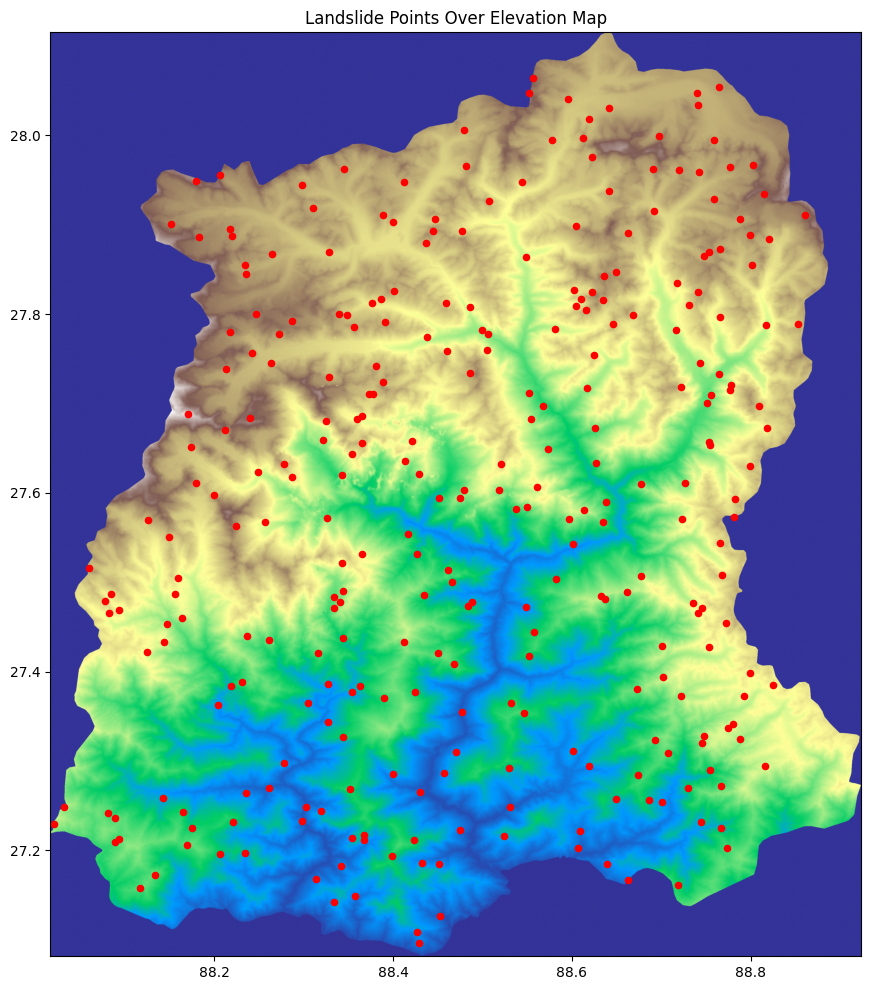

In [9]:
# Show points and elevation raster on a matplotlib plot
fig, ax = plt.subplots(figsize=(12, 12))
points.plot(ax=ax, color='red', markersize=20)
show(elevation_raster, ax=ax, cmap='terrain')
plt.title('Landslide Points Over Elevation Map')
plt.show()

In [10]:
# Extracting the raster values to the points shapefile
print("Extracting raster values to points...")

for index, row in points.iterrows(): # iterate over the points in the shapefile
    longitude = row['geometry'].x # get the longitude of the point
    latitude = row['geometry'].y  # get the latitude of the point

    try:
        # Get the corresponding pixel for each point
        rowIndex, colIndex = elevation_raster.index(longitude, latitude)

        # Extract the raster values at the point location
        points.loc[index, 'Elevation'] = elevation_arr[rowIndex, colIndex]
        points.loc[index, 'Slope'] = slope_arr[rowIndex, colIndex]
        points.loc[index, 'Aspect'] = aspect_arr[rowIndex, colIndex]
        points.loc[index, 'Curvature'] = curvature_arr[rowIndex, colIndex]
        points.loc[index, 'TWI'] = twi_arr[rowIndex, colIndex]
        points.loc[index, 'Dist_Roads'] = dist_roads_arr[rowIndex, colIndex]
        points.loc[index, 'Dist_Rivers'] = dist_rivers_arr[rowIndex, colIndex]
        points.loc[index, 'Rainfall'] = rainfall_arr[rowIndex, colIndex]

    except Exception as e:
        print(f"Error processing point {index}: {e}")
        # Set to no data value if extraction fails
        points.loc[index, 'Elevation'] = -9999
        points.loc[index, 'Slope'] = -9999
        points.loc[index, 'Aspect'] = -9999
        points.loc[index, 'Curvature'] = -9999
        points.loc[index, 'TWI'] = -9999
        points.loc[index, 'Dist_Roads'] = -9999
        points.loc[index, 'Dist_Rivers'] = -9999
        points.loc[index, 'Rainfall'] = -9999

print("Raster value extraction completed!")

Extracting raster values to points...
Error processing point 7: index 3499 is out of bounds for axis 0 with size 3412
Error processing point 18: index 3611 is out of bounds for axis 0 with size 3587
Error processing point 35: index 3133 is out of bounds for axis 1 with size 3079
Error processing point 36: index 3669 is out of bounds for axis 0 with size 3587
Error processing point 62: index 3541 is out of bounds for axis 0 with size 3412
Error processing point 66: index 3451 is out of bounds for axis 0 with size 3412
Error processing point 91: index 3463 is out of bounds for axis 0 with size 3412
Error processing point 131: index 3553 is out of bounds for axis 0 with size 3412
Error processing point 140: index 3518 is out of bounds for axis 0 with size 3412
Error processing point 170: index 3451 is out of bounds for axis 0 with size 3412
Error processing point 172: index 3736 is out of bounds for axis 0 with size 3587
Error processing point 174: index 3104 is out of bounds for axis 1 w

/tmp/ipython-input-3993833900.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.349388122558594' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  points.loc[index, 'Slope'] = slope_arr[rowIndex, colIndex]
/tmp/ipython-input-3993833900.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.35596466064453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  points.loc[index, 'Aspect'] = aspect_arr[rowIndex, colIndex]
/tmp/ipython-input-3993833900.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.638662338256836' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  points.loc[index, 'Curvature'] = curvature_arr[rowIndex,

Error processing point 195: index 3587 is out of bounds for axis 0 with size 3587
Error processing point 221: index 3782 is out of bounds for axis 0 with size 3587
Error processing point 224: index 3514 is out of bounds for axis 0 with size 3412
Error processing point 271: index 3421 is out of bounds for axis 0 with size 3412
Error processing point 283: index 3448 is out of bounds for axis 0 with size 3412
Raster value extraction completed!


In [11]:
# Display the points with extracted values
print("First 10 points with extracted factor values:")
points.head(10)

# Check for any missing values
print("\nMissing values check:")
print(points.isnull().sum())

# Check data statistics
print("\nData statistics:")
print(points.describe())

First 10 points with extracted factor values:

Missing values check:
FID            0
geometry       0
Elevation      0
Slope          5
Aspect         5
Curvature      6
TWI            5
Dist_Roads     0
Dist_Rivers    0
Rainfall       3
dtype: int64

Data statistics:
              FID   Elevation        Slope       Aspect    Curvature  \
count  300.000000   300.00000   295.000000   295.000000   294.000000   
mean   149.500000  2878.34000  -548.340817  -408.924565  -567.193001   
std     86.746758  3483.77272  2341.037913  2377.772668  2340.570596   
min      0.000000 -9999.00000 -9999.000000 -9999.000000 -9999.000000   
25%     74.750000  2167.75000    18.312988    65.301411     4.462345   
50%    149.500000  3665.50000    27.899343   171.862244     9.073901   
75%    224.250000  4920.25000    37.565365   268.130005    15.367351   
max    299.000000  7659.00000    70.843163   358.653442    41.277355   

               TWI     Rainfall  
count   295.000000   297.000000  
mean   -573.9

In [12]:
points.head()

,FID,geometry,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_Rivers,Rainfall
0,0,POINT (88.76664 27.22493),1619,32.349388,48.355965,21.638662,5.217280,-340282306073709652508363335590014353408.0,-340282306073709652508363335590014353408.0,4.402229
1,1,POINT (88.70063 27.42836),3329,39.787426,7.550389,13.139572,0.874913,0.011062,0.270632,2.732113
2,2,POINT (88.4789 27.60265),2924,44.876678,237.554245,37.754128,1.389595,0.003503,0.023731,3.037205
3,3,POINT (88.50558 27.75938),3929,18.425974,22.603764,6.516585,2.482432,0.056124,0.039088,2.866511
4,4,POINT (88.77752 27.72045),3910,28.859726,310.255951,16.402859,1.980297,0.030472,-340282306073709652508363335590014353408.0,2.054487


In [13]:
# Remove points that couldn't extract proper values (where Elevation = -9999)
initial_count = len(points)
points_clean = points[points['Elevation'] != -9999].copy()
final_count = len(points_clean)

print(f"Initial points: {initial_count}")
print(f"Points after cleaning: {final_count}")
print(f"Removed points: {initial_count - final_count}")

# Reset index
points_clean.reset_index(drop=True, inplace=True)
points_clean.head()

Initial points: 300
Points after cleaning: 283
Removed points: 17


,FID,geometry,Elevation,Slope,Aspect,Curvature,TWI,Dist_Roads,Dist_Rivers,Rainfall
0,0,POINT (88.76664 27.22493),1619,32.349388,48.355965,21.638662,5.217280,-340282306073709652508363335590014353408.0,-340282306073709652508363335590014353408.0,4.402229
1,1,POINT (88.70063 27.42836),3329,39.787426,7.550389,13.139572,0.874913,0.011062,0.270632,2.732113
2,2,POINT (88.4789 27.60265),2924,44.876678,237.554245,37.754128,1.389595,0.003503,0.023731,3.037205
3,3,POINT (88.50558 27.75938),3929,18.425974,22.603764,6.516585,2.482432,0.056124,0.039088,2.866511
4,4,POINT (88.77752 27.72045),3910,28.859726,310.255951,16.402859,1.980297,0.030472,-340282306073709652508363335590014353408.0,2.054487


In [14]:
# Save the points file as shapefile
output_shapefile = '/content/drive/MyDrive/Research/sikki_for_use_after/sikkim_test1.shp'
points_clean.to_file(output_shapefile)
print(f"Shapefile saved: {output_shapefile}")

# Also save as CSV for easy viewing
output_csv = '/content/drive/MyDrive/Research/sikki_for_use_after/sikkim_test1.csv'
# Drop geometry column for CSV
points_clean.drop('geometry', axis=1).to_csv(output_csv, index=False)
print(f"CSV file saved: {output_csv}")

/tmp/ipython-input-1212147011.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  points_clean.to_file(output_shapefile)
/usr/local/lib/python3.12/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Dist_Rivers' to 'Dist_River'
  ogr_write(


Shapefile saved: /content/drive/MyDrive/Research/sikki_for_use_after/sikkim_test1.shp
CSV file saved: /content/drive/MyDrive/Research/sikki_for_use_after/sikkim_test1.csv
